# <font color=Crimson size=6 face="宋体" align="center">k均值聚类算法（k-means clustering algorithm）</font>     
--------------

kmeans算法是无监督的聚类算法

以二维模拟样本为例，使用Kmeans算法聚类

In [28]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import pylab
import os

from dataset_producer import Dataset

## 导入原始数据(import the dataset)
TODO:
添加样本点更多、数据分布不同的数据集

In [29]:
#数据集存放位置
DATA_DIR="testdata/"
all_data_path=[]
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        all_data_path.append(os.path.join(root,file))
        
#可交互文件选择模块
iw_filename=widgets.Dropdown(
    options=all_data_path,
    description='选择数据集:',
    disabled=False,
)

w_gen_rand=widgets.Button(
    description='generate random dataset',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

w_rand_size=widgets.IntSlider()
def show_base_data(filename:str):
    with open(filename,mode='r') as file:
        for line in file:
            print(line)

def generate_rand_data():

interact(show_base_data,filename=iw_filename)

interactive(children=(Dropdown(description='选择数据集:', options=('testdata/testSet.txt', 'testdata/testSet2.txt')…

<function __main__.show_base_data(filename: str)>

## 探索数据(explore the data)

In [30]:
"""
对于给定数据集进行相关处理并展示
"""
def show_data_shape(x:np.array):
    return

def load_data(filename:str)->np.array:
    """
    将txt文件中的数据转换成np数组
    :param filename:模拟数据文件路径
    :return:np数组
    """
    dataset = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        m = len(lineArr)
        dataset.append(lineArr[0:m])
    data=np.array(dataset,dtype=np.float64)
    print ("该数据集有%d个%d维数据"%(data.shape[0],data.shape[1]))
    return data

def draw_dataset(x:np.array):
    """
    用matplotlib绘制数据
    :param x:
    :return:
    """
    #可视化一下
    plt.scatter(x[:,0],x[:,1],marker='x',color = 'r')
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.show()

In [31]:
def choose(filename:str):
    """
    数据集选择流程
    用户通过下拉菜单选择数据集
    进行相关处理并展示
    :param filename:widget传入的文件名
    """
    pylab.rcParams['figure.figsize'] = (6,4)
    x = load_data(filename)
    draw_dataset(x)


# ow_data_shape=widgets.Output().append_stdout("该数据集有%d个%d维数据"%(np_data.shape[0],np_data.shape[1]))
# ow_draw_data=widgets.interactive_output(choose,{'filename':iw_filename})
# widgets.HBox([widgets.VBox([filename_widget,ow_data_shape,ow_draw_data]),ow_base_data])
interact(choose,filename=iw_filename)

interactive(children=(Dropdown(description='选择数据集:', options=('testdata/testSet.txt', 'testdata/testSet2.txt')…

<function __main__.choose(filename: str)>

Kmeans算法

初始化聚类中心

TODO:
1.更新K值全部初始化中心点
2.按钮添加一个随机中心点
3.输入坐标添加中心点

In [5]:
def plot_data(x,idx,K,cent,centroids,cnt):
    m=x.shape[0]
    tmp_idx=[]
    color_list=['r','g','y','b','m','orange']
    tmp_idx=idx[:,0].tolist() #要把numpyfloat64转换为list int
    for i in range(m):
        plt.scatter(x[i,0],x[i,1],marker='x',color=color_list[int(tmp_idx[i])])

   # plt.scatter(centroids[:,0],centroids[:,1],marker='o',color = 'black',linewidths=10)

    for k in range(K):
        plt.scatter(centroids[k,0],centroids[k,1],marker='o',color = color_list[k],linewidths=10)
        plt.plot(np.array(cent["%d"%(k)])[:,0],np.array(cent["%d"%(k)])[:,1],"b-o",color=color_list[k])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("figure %d"%(cnt))
    plt.savefig("figure %d.jpg"%(cnt),dpi=300)
    plt.show()

def randCentroids(x:np.array,k:int)->np.array:
    """
    随机初始化centroids ,随机选择k个样本点作为质心
    :param x:numpy_data
    :param k:随机选取k个
    :return:选取的中心点
    """
    m,n = x.shape # m=80个数据，n=2维
    centroids = np.zeros((k,n)) #产生k个 [0 0]的数据
    randIndex = np.random.choice(m,k) #从m个数据中选k个randindex
    centroids = x[randIndex]
    return centroids

#可交互K值选择
K_widget=widgets.IntSlider(value=4,min=1, max=6, step=1, continuous_update=False)
interact(randCentroids,k=K_widget)

In [2]:
#计算距离
def computeDistance(A,B):
    return np.sqrt(np.sum(np.square(A-B)))

#计算x的均值，改变centroids
def change_centroids(x,idx,K):
    m,n = x.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        index = np.where(idx[:,0].ravel() == i)
        centroids[i] = np.mean(x[index],axis=0)
    return centroids

#为数据集x找到最近的质心,直到质心不变为止   
def kmeans(x,K):
    #1.初始化质心
    centroids = randCentroids(x,K)
    m = x.shape[0]
    idx = np.zeros((x.shape[0],2)) #记录x对应的质心的下标 + 平方误差
    clusterchanged = True #记录分类变没变化
    cent = {} #用字典，来存储各个质心的变化
    cnt=0 #记录分配点的次数
    
    # 初始化质心字典
    for k in range(K):
        cent["%d"%(k)] = []
        cent["%d"%(k)].append(centroids[k,:].tolist())
        
    while clusterchanged:
        
        clusterchanged = False
        #2.为每个样本点分配质心
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(K):
                distance = computeDistance(x[i,:],centroids[j,:])
                if distance<minDist:
                    minDist = distance
                    minIndex = j
            if idx[i,0] != minIndex:
                clusterchanged = True
            idx[i,:] = minIndex, minDist**2
        #分配完点之后的情况输出一下
        cnt=cnt+1
        plot_data(x,idx,K,cent,centroids,cnt)
        #3.更新质心的位置
        centroids = change_centroids(x,idx,K)
        # 4.更新质心字典
        for k in range(K):
            cent["%d"%(k)].append(centroids[k,:].tolist())
    plot_data(x,idx,K,cent,centroids,cnt)
    
    return centroids,idx,cent,cnt



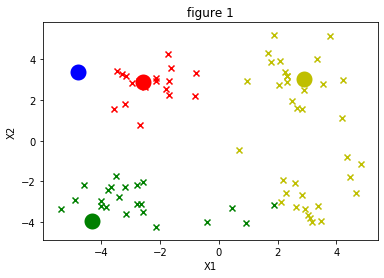

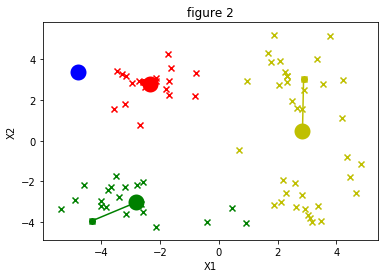

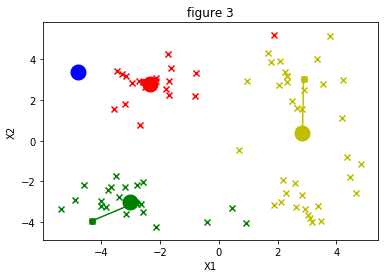

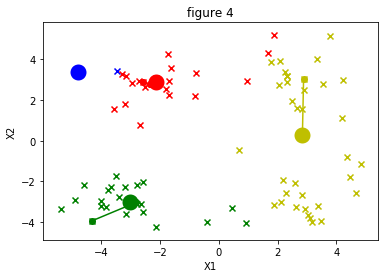

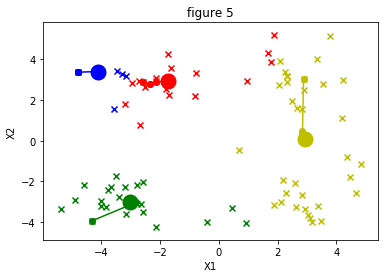

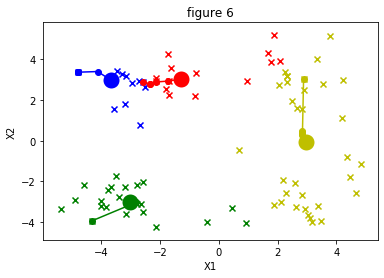

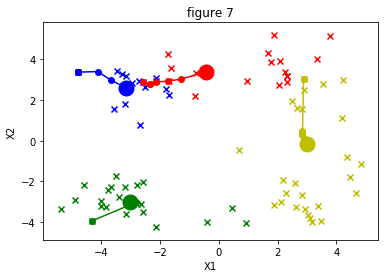

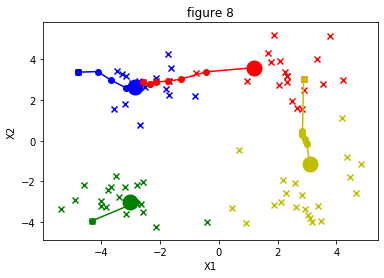

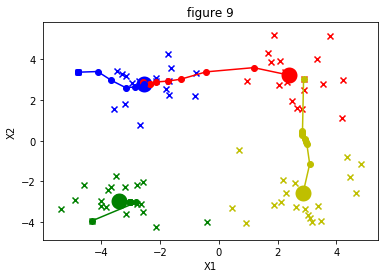

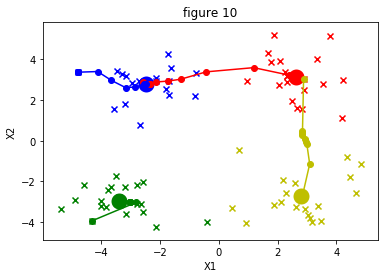

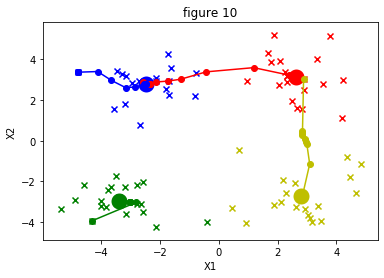

In [4]:
pylab.rcParams['figure.figsize'] = (6,4)
centroids,idx,cent,cnt = kmeans(load_data(filename_widget.value),K_widget.value)

In [5]:

def choose_display(n):
    pylab.rcParams['figure.figsize'] = (10,10)
    a=plt.imread("figure %d.jpg"%(n))
    plt.axis("off")
    plt.imshow(a)

n_widget=widgets.IntSlider(min=1,max=cnt,description='迭代次数')
play_widget = widgets.Play(
    interval=2000,
    value=1,
    min=1,
    max=cnt,
    step=1,
    description="Press play",
    disabled=False
)
widgets.jslink((play_widget, 'value'), (n_widget, 'value'))
out = widgets.interactive_output(choose_display, {'n': n_widget})
widgets.VBox([widgets.HBox([play_widget,n_widget]), out])

Kmeans算法的局限性

TODO:
1.依赖初始聚类中心
2.K值的选择
3.适用的数据类型